In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
Terror = pd.read_csv("/content/sample_data/globalterrorism.csv" , on_bad_lines='skip', encoding='latin')
pd.set_option("display.max_column",500 )

<ipython-input-31-ddad191f835e>:1: DtypeWarning: Columns (4,76,94,96) have mixed types. Specify dtype option on import or set low_memory=False.
  Terror = pd.read_csv("/content/sample_data/globalterrorism.csv" , on_bad_lines='skip', encoding='latin')


In [32]:
Terror.shape

(7335, 135)

In [33]:
Terror.head(1)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN


In [34]:
cols=['iyear','imonth','iday','country_txt','city','latitude',
      'longitude','location','attacktype1_txt','targtype1_txt','targsubtype1_txt','target1',
      'gname','motive','weaptype1_txt','dbsource','region_txt','nkill','nwound','natlty1_txt','weapdetail'
      ]

In [35]:
Terror_clean=pd.DataFrame(data=Terror , columns=cols)

In [36]:
Terror_clean.shape

(7335, 21)

In [37]:
Terror_clean.isnull().sum()

iyear                  0
imonth                 0
iday                   0
country_txt            0
city                   0
latitude             185
longitude            185
location            6792
attacktype1_txt        0
targtype1_txt          0
targsubtype1_txt     419
target1               65
gname                  1
motive              6744
weaptype1_txt          1
dbsource               1
region_txt             0
nkill                811
nwound              2045
natlty1_txt           20
weapdetail           714
dtype: int64

In [38]:
Terror_clean.head(2)

,iyear,imonth,iday,country_txt,city,latitude,longitude,location,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,gname,motive,weaptype1_txt,dbsource,region_txt,nkill,nwound,natlty1_txt,weapdetail
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,MANO-D,NaN,Unknown,PGIS,Central America & Caribbean,1.0,0.0,Dominican Republic,NaN
1,1970,0,0,Mexico,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,PGIS,North America,0.0,0.0,Belgium,NaN


In [39]:
Terror_clean.rename(columns={'iyear':'year' , 'imonth':'month' ,'iday':'day','country_txt':'country name','attacktype1_txt':'attacktype','targtype1_txt':'targtype','targsubtype2':'targsubtype2',
              'gname':'group_name','weaptype1_txt':'weaptype','dbsource':'source','region_txt':'region1','nkill':'Killed','nwound':'Wounded','weapdetail':'weapon_detail','natlty1_txt':'nationality'
 } , inplace=True)

In [40]:
pd.set_option("display.max_columns",500) #max coulmns

In [41]:
Terror_clean.head(1)

,year,month,day,country name,city,latitude,longitude,location,attacktype,targtype,targsubtype1_txt,target1,group_name,motive,weaptype,source,region1,Killed,Wounded,nationality,weapon_detail
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,MANO-D,NaN,Unknown,PGIS,Central America & Caribbean,1.0,0.0,Dominican Republic,NaN


In [42]:
Terror_clean['casualities']=Terror_clean['Wounded']+Terror_clean['Killed']

In [43]:
Terror_clean.head(3)

,year,month,day,country name,city,latitude,longitude,location,attacktype,targtype,targsubtype1_txt,target1,group_name,motive,weaptype,source,region1,Killed,Wounded,nationality,weapon_detail,casualities
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,MANO-D,NaN,Unknown,PGIS,Central America & Caribbean,1.0,0.0,Dominican Republic,NaN,1.0
1,1970,0,0,Mexico,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,PGIS,North America,0.0,0.0,Belgium,NaN,0.0
2,1970,1,0,Philippines,Unknown,15.478598,120.599741,NaN,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,Unknown,NaN,Unknown,PGIS,Southeast Asia,1.0,0.0,United States,NaN,1.0


In [44]:
nationality_top = Terror_clean[Terror_clean['nationality'] != 'Unknown']

In [45]:
nationality_type=nationality_top['nationality'].value_counts().reset_index()

In [46]:
nationality_type.rename(columns={"index":'Nationality','nationality':'Counts'},inplace=True)
nationality_type

,Nationality,Counts
0,United States,1841
1,Northern Ireland,944
2,Italy,642
3,Spain,630
4,Great Britain,479
...,...,...
104,Ivory Coast,1
105,Sri Lanka,1
106,Somalia,1
107,Hong Kong,1


In [47]:
Terror_clean['nationality'].unique()

array(['Dominican Republic', 'Belgium', 'United States', 'Uruguay',
       'Germany', 'Great Britain', 'Venezuela', 'Puerto Rico', 'Israel',
       'Austria', 'Switzerland', 'Jordan', 'Ethiopia', 'Spain', nan,
       'Japan', 'International', 'Egypt', 'Paraguay', 'Soviet Union',
       'Ireland', 'Argentina', 'Philippines', 'China',
       'West Bank and Gaza Strip', 'Multinational', 'Northern Ireland',
       'Brazil', 'Haiti', 'South Africa', 'Portugal', 'Colombia',
       'Greece', 'Nicaragua', 'Indonesia', 'Yugoslavia', 'Italy',
       'Rhodesia', 'Ivory Coast', 'Iran', 'Canada', 'Poland', 'Sweden',
       'Turkey', 'Costa Rica', 'Russia', 'Iraq', 'Cuba', 'France',
       'Malawi', 'Democratic Republic of the Congo', 'Netherlands',
       'Chile', 'Hong Kong', 'Yemen', 'Mexico', 'Syria', 'India',
       'New Zealand', 'Senegal', 'Algeria', 'Peru', 'Czechoslovakia',
       'Saudi Arabia', 'Denmark', 'West Germany (FRG)', 'Bahamas',
       'Bolivia', 'El Salvador', 'Botswana', 'Guate

In [48]:
terr= Terror_clean[Terror_clean['group_name'] != 'Unknown']
Terror_Group_Org=terr['group_name'].value_counts().reset_index()
Terror_Group_Org.rename(columns={"index":'Group_name','group_name':'Counts'},inplace=True)
Terror_Group_Org

,Group_name,Counts
0,Irish Republican Army (IRA),820
1,Basque Fatherland and Freedom (ETA),263
2,Protestant extremists,188
3,Left-Wing Militants,169
4,Ulster Volunteer Force (UVF),164
...,...,...
499,Military Council for the True Liberation of Al...,1
500,AGEL,1
501,Lolita Lebron Puerto Rican Liberation Command,1
502,Arya,1


In [49]:
Terror_clean.head(3)

,year,month,day,country name,city,latitude,longitude,location,attacktype,targtype,targsubtype1_txt,target1,group_name,motive,weaptype,source,region1,Killed,Wounded,nationality,weapon_detail,casualities
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,MANO-D,NaN,Unknown,PGIS,Central America & Caribbean,1.0,0.0,Dominican Republic,NaN,1.0
1,1970,0,0,Mexico,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,PGIS,North America,0.0,0.0,Belgium,NaN,0.0
2,1970,1,0,Philippines,Unknown,15.478598,120.599741,NaN,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,Unknown,NaN,Unknown,PGIS,Southeast Asia,1.0,0.0,United States,NaN,1.0


In [50]:
city1= Terror_clean[Terror_clean['city'] != 'Unknown']

In [51]:
city_cln=city1['city'].value_counts().reset_index()
city_cln.rename(columns={"index":'City_name','city':'Counts'},inplace=True)
city_cln

,City_name,Counts
0,Belfast,732
1,New York City,317
2,Rome,290
3,Buenos Aires,188
4,Madrid,154
...,...,...
1434,Dineault,1
1435,Salamanca,1
1436,Milfield,1
1437,Ballyginniff,1


In [52]:
wp=Terror_clean[Terror_clean['weaptype'] != 'Unknown']
weaptype_cln=wp['weaptype'].value_counts().reset_index()
weaptype_cln.rename(columns={"index":'weapon_type','weaptype':'Counts'},inplace=True)
weaptype_cln

,weapon_type,Counts
0,Explosives,3417
1,Firearms,2151
2,Incendiary,1101
3,Melee,65
4,Chemical,29
5,Sabotage Equipment,3
6,Fake Weapons,3
7,Vehicle (not to include vehicle-borne explosiv...,1
8,Radiological,1
9,Other,1


In [56]:
Terror_clean.head(1)

,year,month,day,country name,city,latitude,longitude,location,attacktype,targtype,targsubtype1_txt,target1,group_name,motive,weaptype,source,region1,Killed,Wounded,nationality,weapon_detail,casualities
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,MANO-D,NaN,Unknown,PGIS,Central America & Caribbean,1.0,0.0,Dominican Republic,NaN,1.0


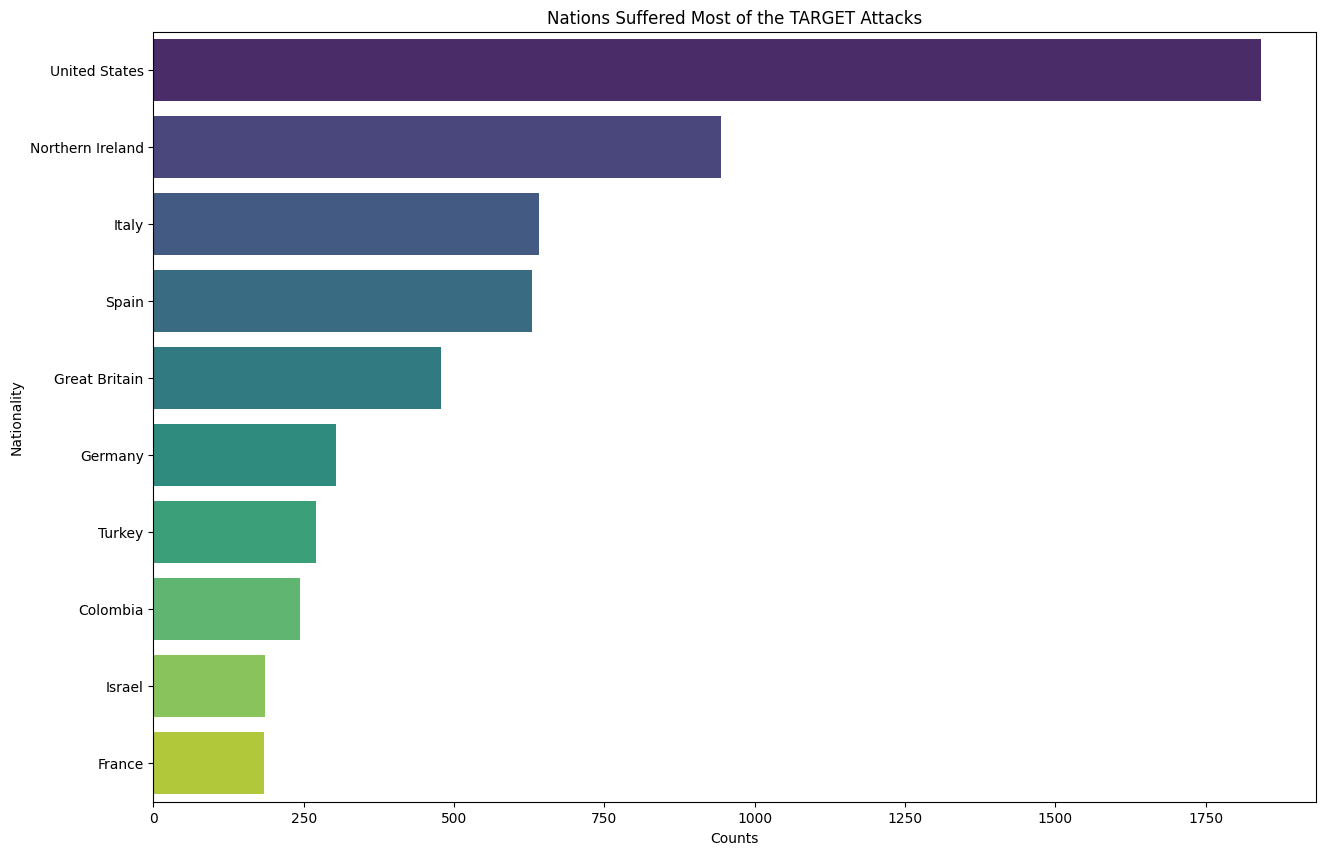

In [54]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x="Counts", y="Nationality", data=nationality_type[:10],
                 palette="viridis").set_title('Nations Suffered Most of the TARGET Attacks')

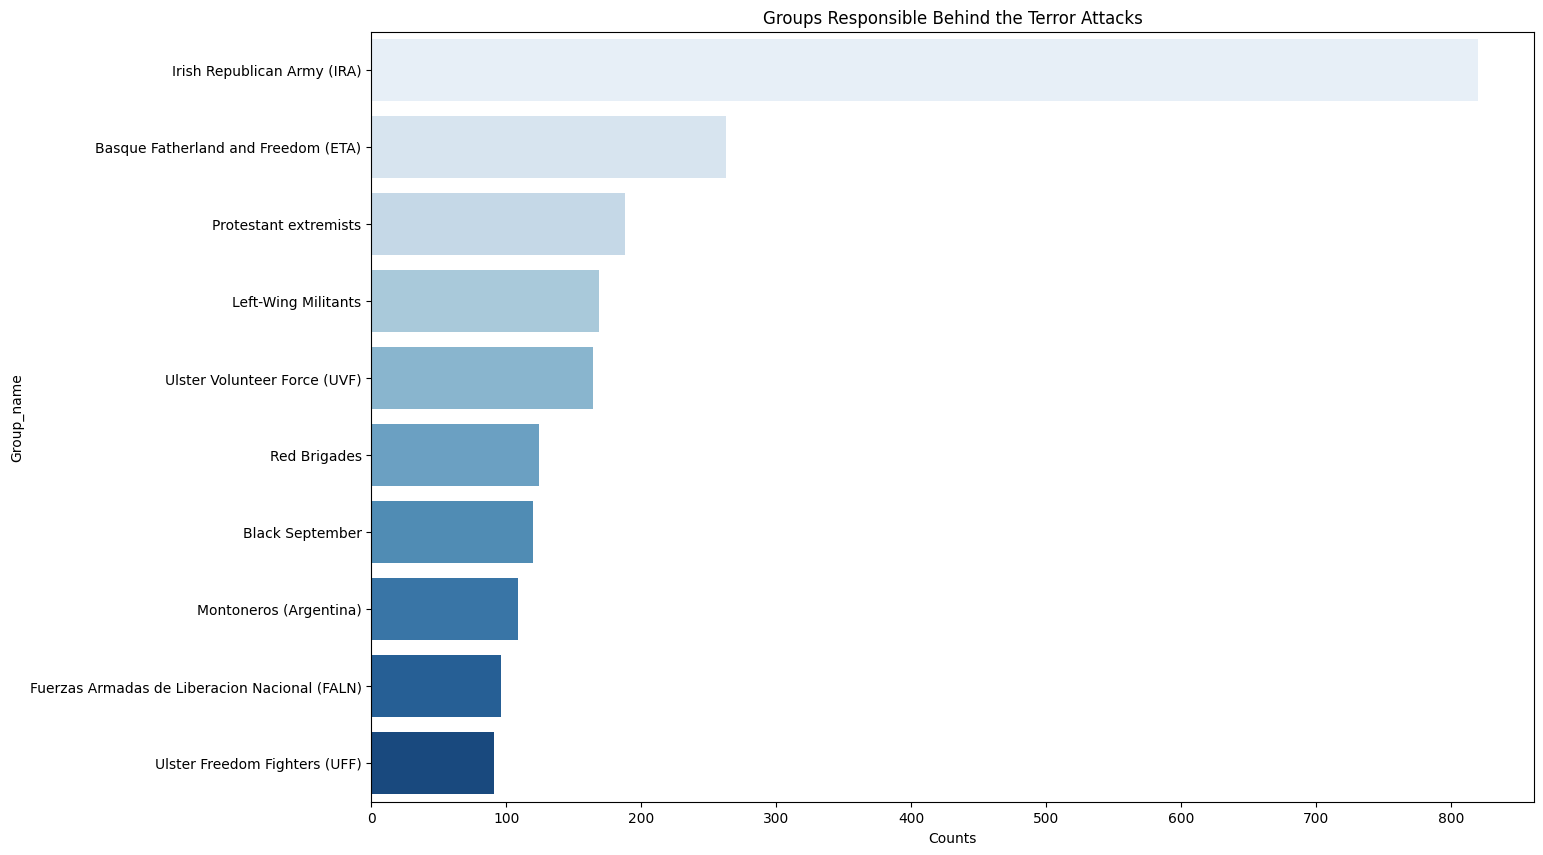

In [55]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x="Counts", y="Group_name", data=Terror_Group_Org[:10],
                 palette="Blues").set_title('Groups Responsible Behind the Terror Attacks')

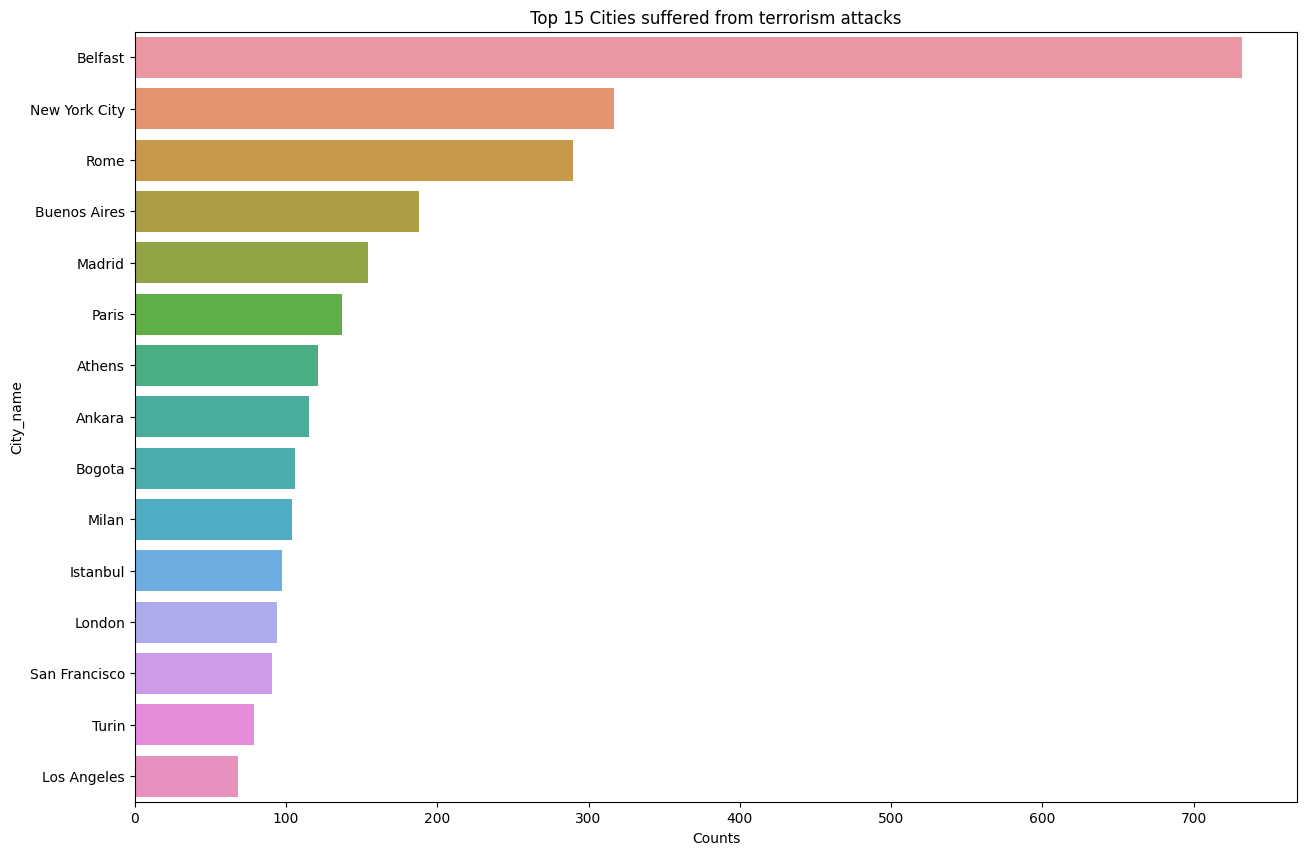

In [58]:
f,ax=plt.subplots(figsize=(15,10))
ax = sns.barplot(x="Counts", y="City_name", data= city_cln[:15]). set_title('Top 15 Cities suffered from terrorism attacks')

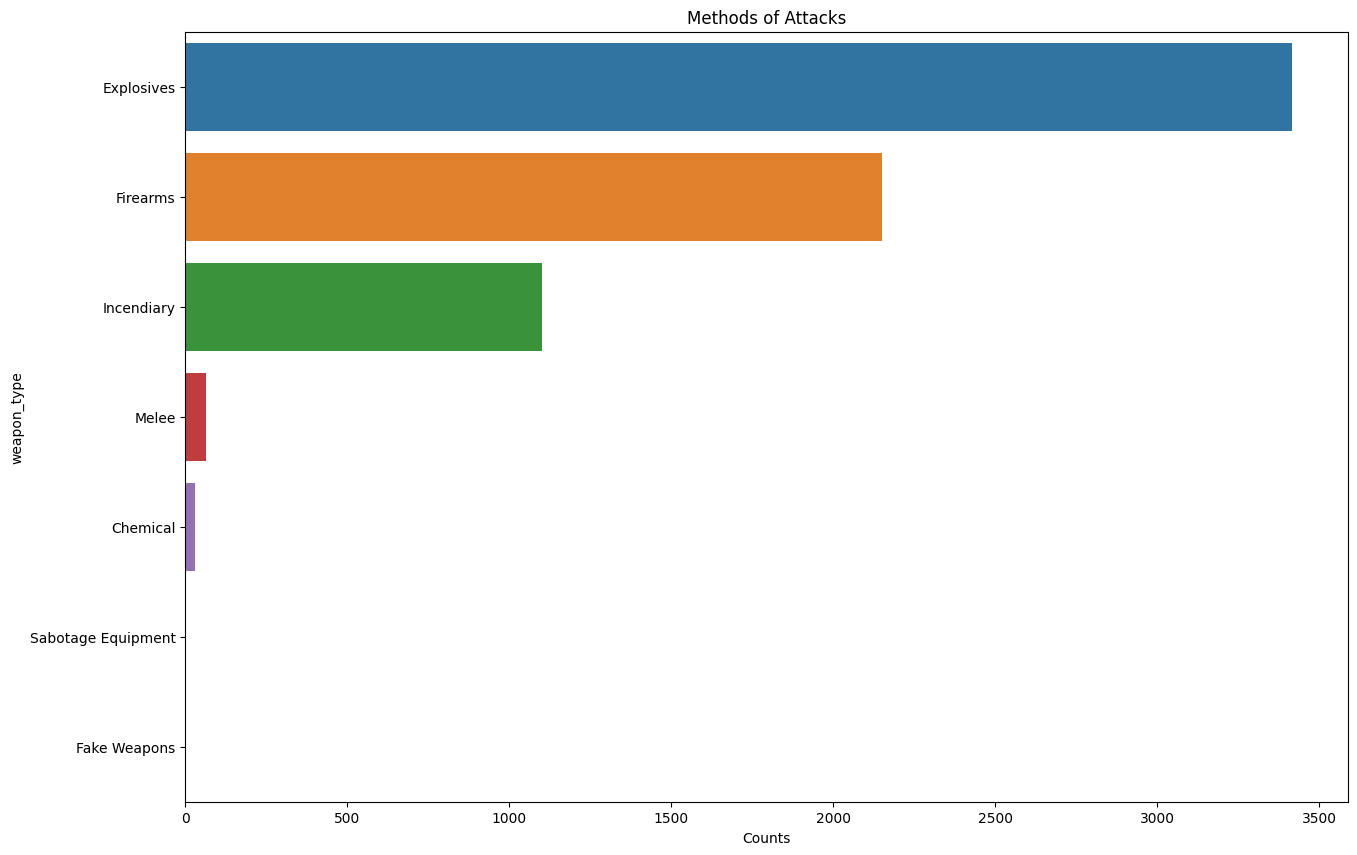

In [59]:
f,ax=plt.subplots(figsize=(15,10))
ax = sns.barplot(x="Counts", y="weapon_type", data= weaptype_cln[:7]). set_title('Methods of Attacks')

In [61]:
Terror_clean['attacktype'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

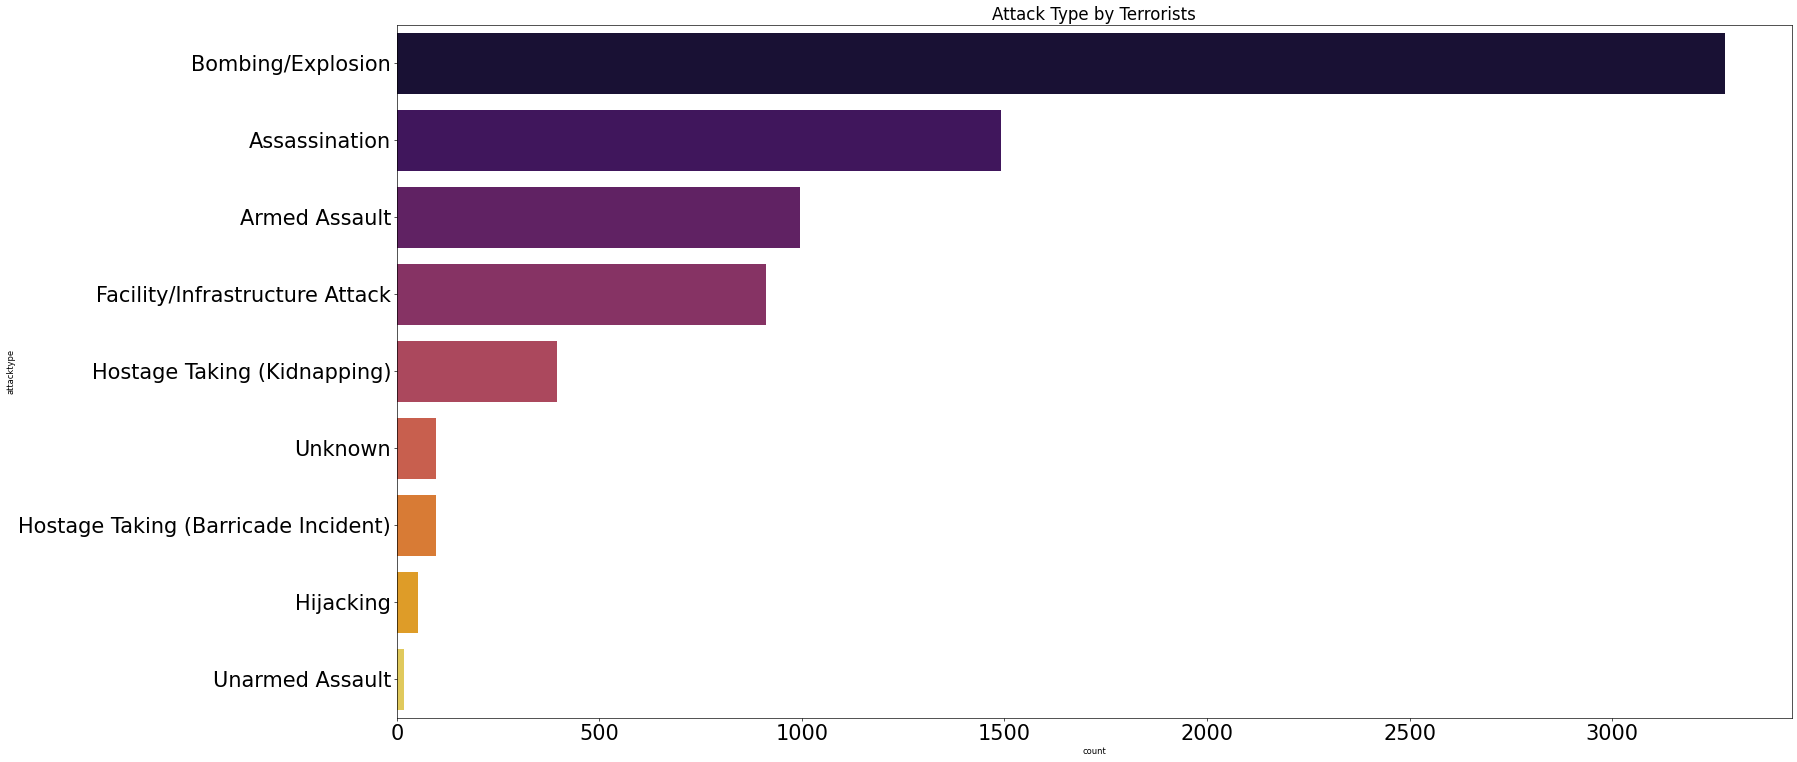

In [64]:
plt.subplots(figsize=(30,15),dpi=60)
sns.countplot(y='attacktype', data=Terror_clean, palette='inferno', order= Terror_clean['attacktype'].value_counts().index)
plt.yticks(size=25)
plt.xticks(size=25)
plt.title('Attack Type by Terrorists', size=20)
plt.show()

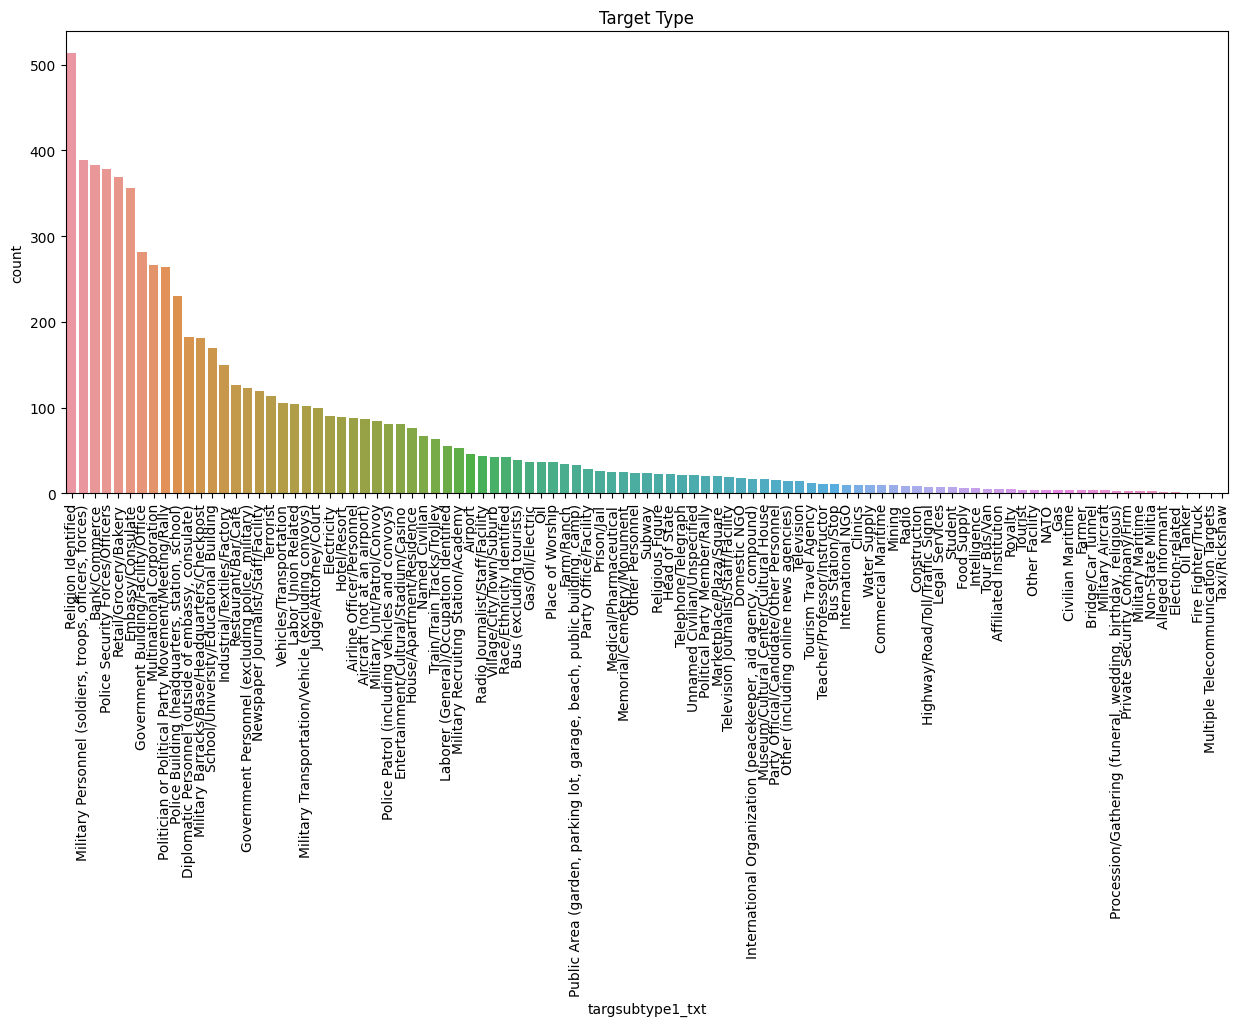

In [68]:
plt.subplots(figsize=(15,6),dpi=100)
sns.countplot(x=Terror_clean['targsubtype1_txt'],order=Terror_clean['targsubtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Target Type')
plt.show()

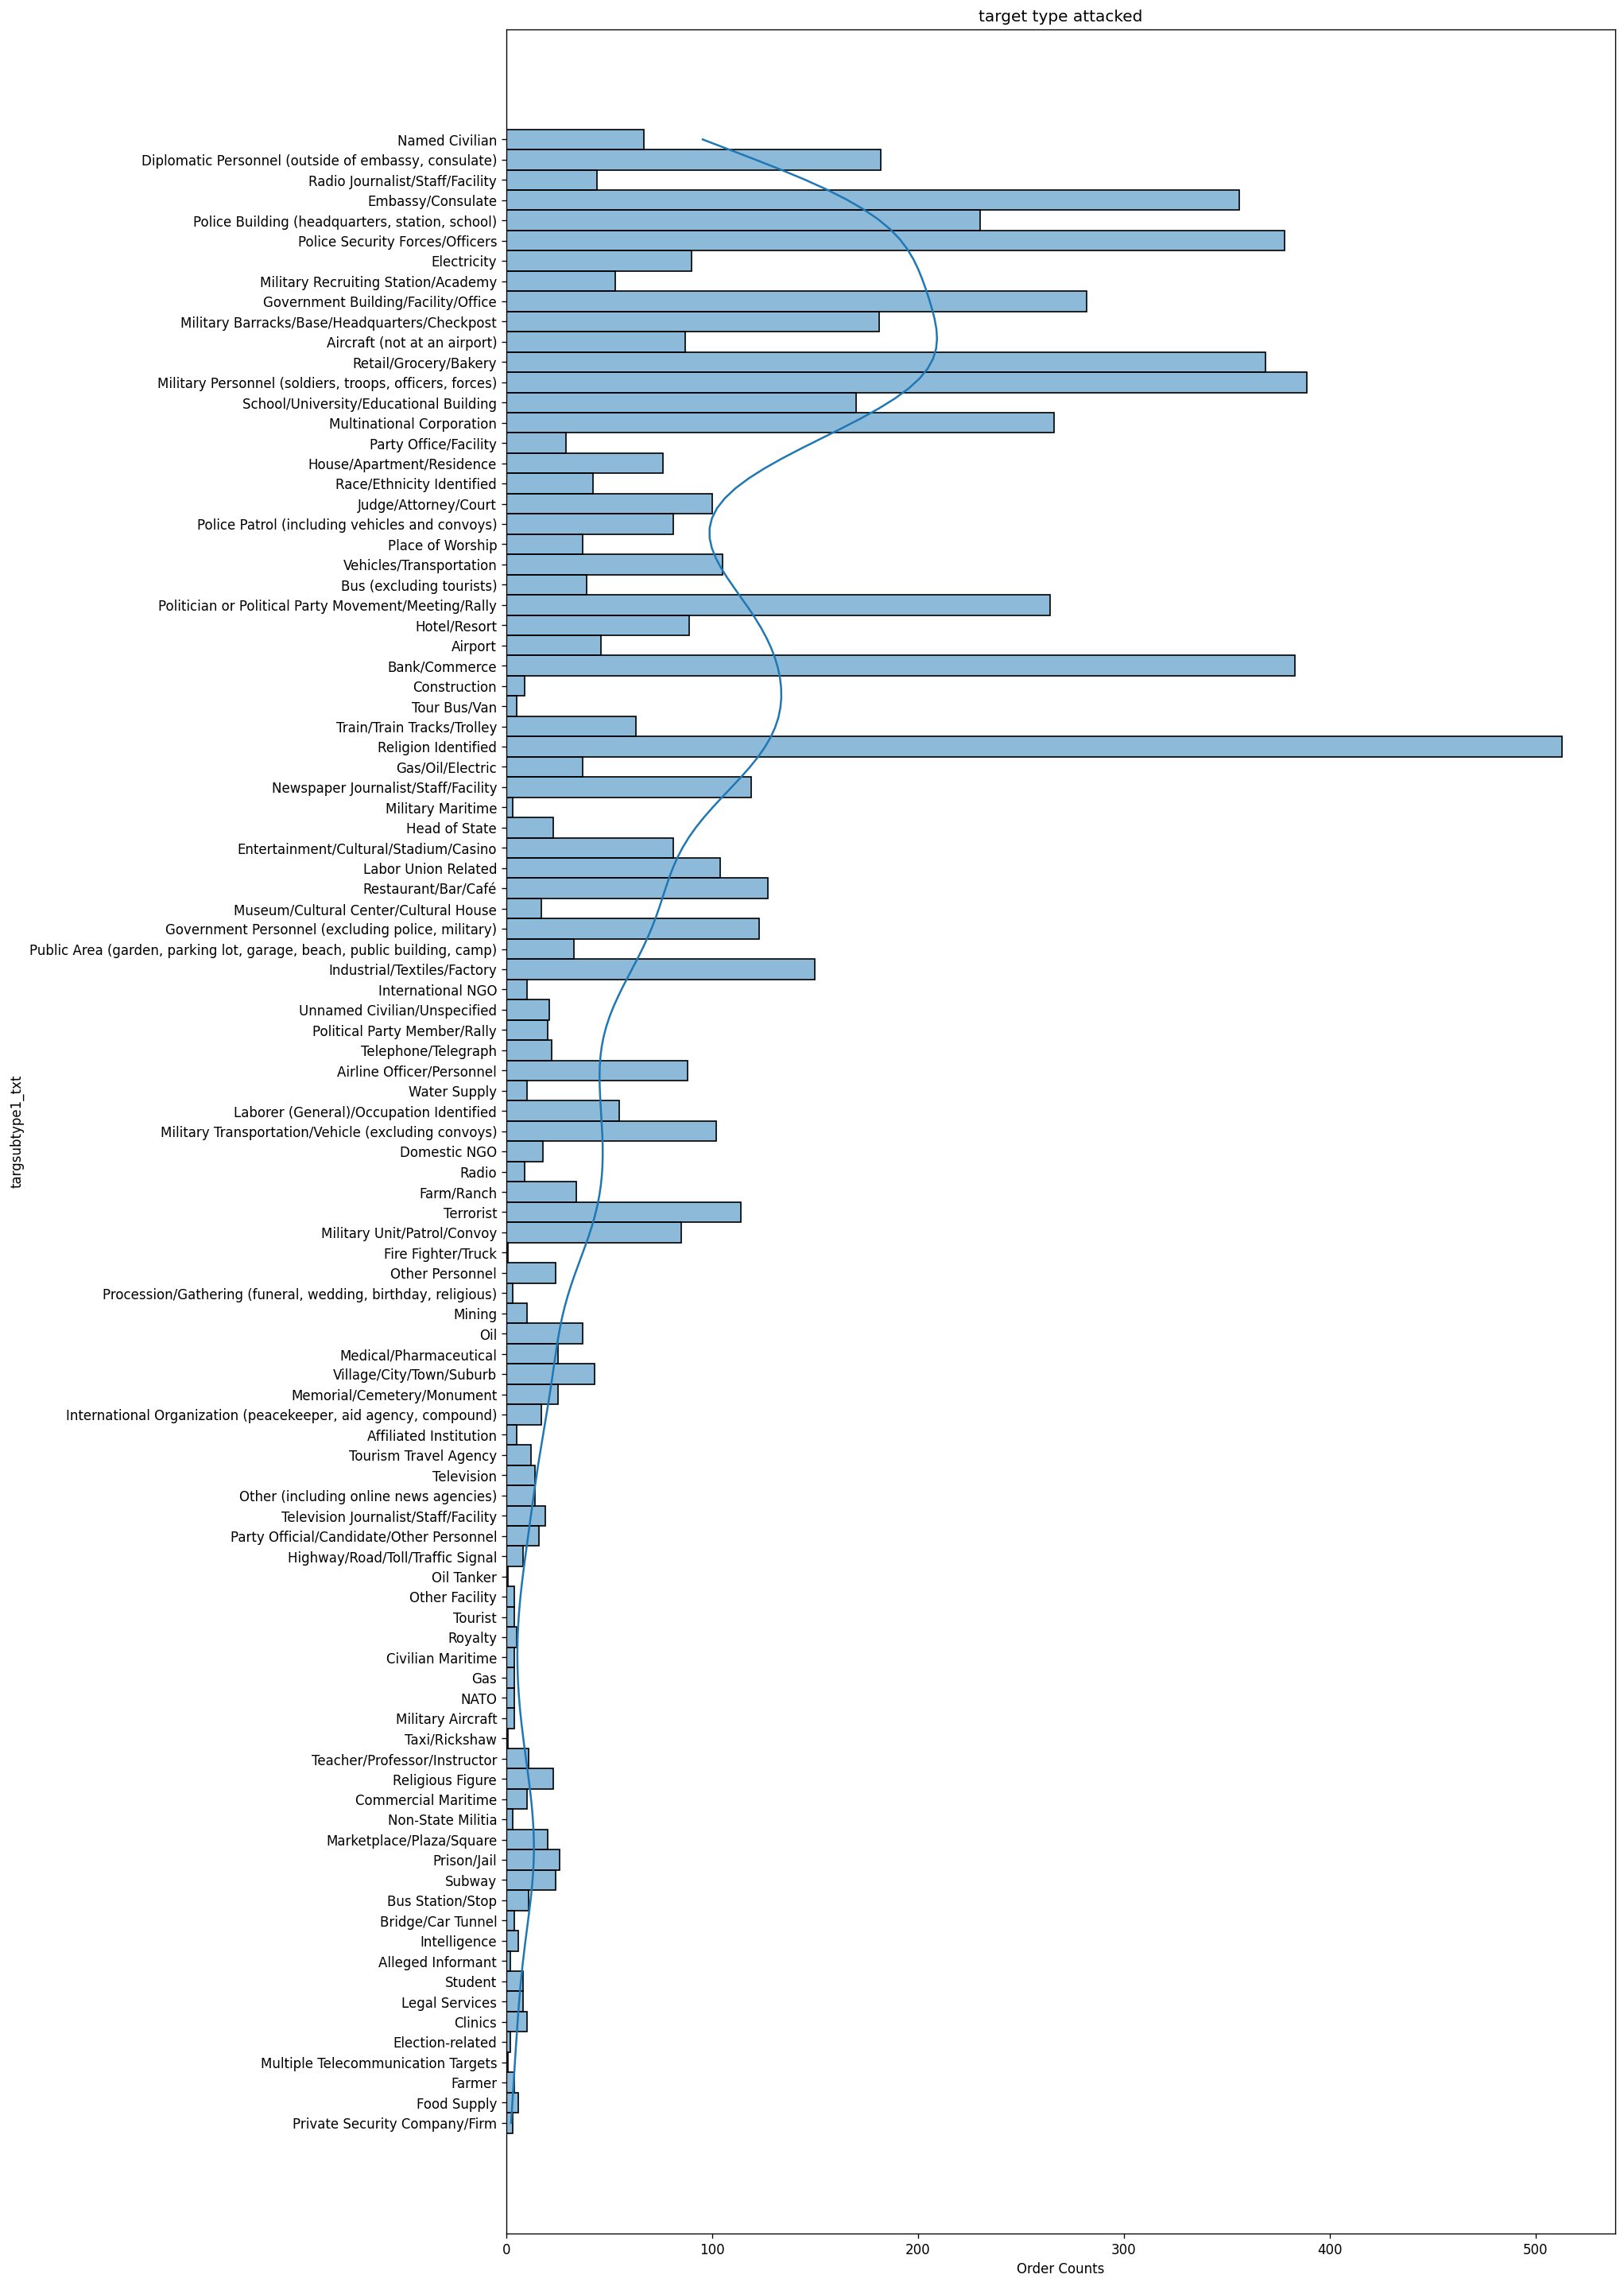

In [72]:
plt.figure(figsize=(15,30), dpi=120)
sns.histplot(data=Terror_clean,
             y= 'targsubtype1_txt',
             bins=15,
             kde=True)
plt.xlabel('Order Counts')
plt.title('target type attacked')
plt.show()